# Задание 1 Вариант 8

In [1]:
import numpy as np
import math
import random
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
n=1000

# Используя метод Маклерена-Марсальи построить датчик БСВ 
## (1 датчик должен быть мультипликативно конгруентный, второй – на выбор). Исследовать точность построенной БСВ.

1) Осуществить моделирование n = 1000 реализаций БСВ с помощью мультипликативного конгруэнтного метода (МКМ) с параметрами a0, β, M = 2^31 .

2) Осуществить моделирование n = 1000 реализаций БСВ с помощью метода Макларена-Марсальи (один датчик должен быть мультипликативно конгруентный (п. 1), второй – на выбор). K – объем вспомогательной таблицы.

3) Проверить точность моделирования обоих датчиков (п. 1 и п. 2) с помощью критерия согласия Колмогорова и χ2-критерия Пирсона с уровнем значимости ε = 0.05.


In [3]:
def get_values(n, generator):
    values=[]
    for i in range(n):
        values.append(next(generator))
    return values

# Default Python rand()

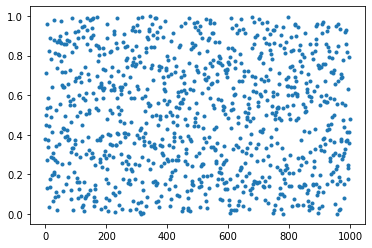

In [4]:
values_def=[random.random() for i in range(n)]
plt.plot([i for i in range(n)],values_def,'.')

# Multiplicative Congruential Generator

In [5]:
a=262147
b=262147
m=math.pow(2,31)

In [6]:
def random_MCG(a,b,m):
    while True:
        a=(b*a)%m
        yield a/m

In [7]:
MCG=random_MCG(a,b,m)

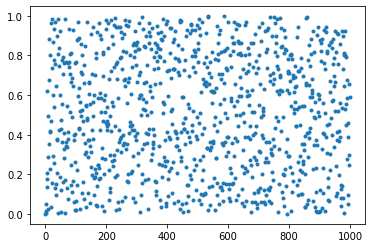

In [8]:
values_MCG=get_values(n,MCG)
plt.plot([i for i in range(n)],values_MCG,'.')

# Generator with Linear Mixed Formulas

In [9]:
a1=32771
b1=32771
a2=65643
b2=65643
m=math.pow(2,31)

In [10]:
def random_LMF(a1,a2,b1,b2,m):
    ta1=0
    while True:
        ta1=a1  
        a1=(a1*b1+a2*b2)%m
        a2=ta1
        yield a1/m

In [11]:
LMFG=random_LMF(a1,a2,b1,b2,m)

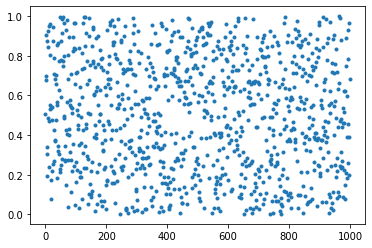

In [12]:
values_LMFG=get_values(n,LMFG)
plt.plot([i for i in range(n)],values_LMFG,'.')

# MacLaren–Marsaglia Generator

In [13]:
k=256

In [14]:
def random_MM(gen_1,gen_2,k):
    v=get_values(k,gen_1)
    ta=0
    while True:
        s=round(next(gen_2)*k)-1
        ta=v[s]
        v[s]=next(gen_1)
        yield ta

In [15]:
MMG=random_MM(MCG,LMFG,k)

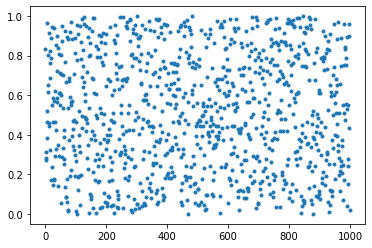

In [16]:
values_MMG=get_values(n,MMG)
plt.plot([i for i in range(n)],values_MMG,'.')

# Критерии согласия

## Хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Критерий_согласия_Пирсона

In [17]:
e=0.05
l=50

In [18]:
def get_chi_squared(values,l):
    p=1/l
    n=len(values)
    vs=get_freqs(values,l)
    res_sum=0
    for v in vs:
        res_sum+=(math.pow((v-n*p),2))/(n*p)
    return res_sum

In [19]:
def chi_check_hypothesis(G,chi_sqared):
    print('X^2: {}, G-1: {}'.format(chi_sqared,G))
    if(chi_sqared<G):
        print('Test is passed')
    else:
        print('Test is not passed')

In [20]:
def get_freqs(values,l):
    step=1/l
    freqs=[0 for i in range(l)]
    for value in values:
        value*=1/step
        i=math.floor(value)
        freqs[i]+=1
    return freqs

Равенство функции распределения хи-квадрат вероятности а означает, что с вероятностью а будут наблюдаться значения хи-квадрат, не большие, чем найденный (определенный согласно функции распределения) квантиль хи-квадрат

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [21]:
G=66.3386

In [22]:
chi_check_hypothesis(G,get_chi_squared(values_def,l))

X^2: 35.5, G-1: 66.3386
Test is passed


In [23]:
chi_check_hypothesis(G,get_chi_squared(values_MCG,l))

X^2: 47.19999999999999, G-1: 66.3386
Test is passed


In [24]:
chi_check_hypothesis(G,get_chi_squared(values_LMFG,l))

X^2: 39.00000000000001, G-1: 66.3386
Test is passed


In [25]:
chi_check_hypothesis(G,get_chi_squared(values_MMG,l))

X^2: 47.400000000000006, G-1: 66.3386
Test is passed


## Колмагорова

https://ru.wikipedia.org/wiki/Критерий_согласия_Колмогорова

In [26]:
def emp_dist_func(x, values):
    n=len(values)
    res_sum=0
    for value in values:
        if(value<=x):
            res_sum+=1
    return res_sum/n

In [27]:
def teor_dist_func(x):
    if(x<=0):
        return 0
    elif(x>1):
        return 1
    else:
        return x

In [28]:
def kolm_check_hypothesis(delta,Dsqrt):
    print('Dn*sqrt(n): {}, Delta: {}'.format(Dsqrt,delta))
    if(Dsqrt<delta):
        print('Test is passed')
    else:
        print('Test is not passed')

In [29]:
def abs_dist_diff(x,values):
    return abs(emp_dist_func(x,values)-teor_dist_func(x))

In [30]:
def kolm_dist(values):
    max_val=scipy.optimize.fmin(lambda x: -abs_dist_diff(x,values), 0,disp=False)[0]
    return abs_dist_diff(max_val,values)

https://ru.wikipedia.org/wiki/Критерий_согласия_Колмогорова

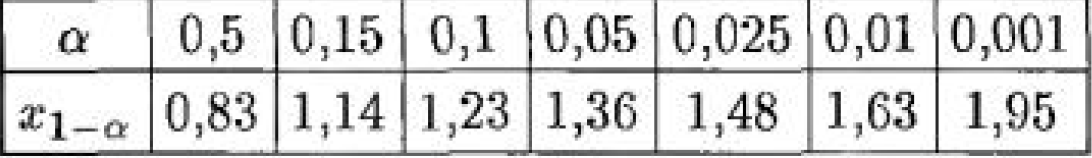

In [31]:
# delta=0.189
delta=1.36

In [32]:
kolm_check_hypothesis(delta,kolm_dist(values_def)*math.sqrt(n))

Dn*sqrt(n): 0.01976423537605237, Delta: 1.36
Test is passed


In [33]:
kolm_check_hypothesis(delta,kolm_dist(values_MCG)*math.sqrt(n))

Dn*sqrt(n): 0.01976423537605237, Delta: 1.36
Test is passed


In [34]:
kolm_check_hypothesis(delta,kolm_dist(values_LMFG)*math.sqrt(n))

Dn*sqrt(n): 0.07510409442899903, Delta: 1.36
Test is passed


In [35]:
kolm_check_hypothesis(delta,kolm_dist(values_MMG)*math.sqrt(n))

Dn*sqrt(n): 0.01976423537605237, Delta: 1.36
Test is passed
